In [63]:
import pennylane as qml
from pennylane import numpy as np 
import matplotlib.pyplot as plt

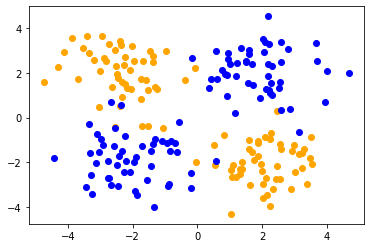

In [82]:
n_samples = 200
A = np.array([[np.random.normal(loc=-2), np.random.normal(loc=2)] for i in range(n_samples//4)]) 
B = np.array([[np.random.normal(loc=2), np.random.normal(loc=-2)] for i in range(n_samples//4)]) 
C = np.array([[np.random.normal(loc=2), np.random.normal(loc=2)] for i in range(n_samples//4)]) 
D = np.array([[np.random.normal(loc=-2), np.random.normal(loc=-2)] for i in range(n_samples//4)]) 

plt.scatter(A[:,0], A[:,1], color = "orange")
plt.scatter(B[:,0], B[:,1], color = "orange")
plt.scatter(C[:,0], C[:,1], color = "blue")
plt.scatter(D[:,0], D[:,1], color = "blue")
plt.show()

In [83]:
feature = np.concatenate([A, B,C,D], axis=0)
label = np.concatenate([-np.ones(n_samples // 2), np.ones(n_samples//2)], axis=0)
data = list(zip(feature, label))

In [84]:
def model(x, w):
    return np.arctan(x[0]*w[0] + x[1]*w[1] + w[2]) / (np.pi / 2)


In [91]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def model(x, w):
    
    qml.RX(x[0]*w[2], wires = 0)
    qml.RX(x[1]*w[3], wires = 1)
    
    qml.RX(w[0], wires = 0)
    qml.RX(w[1], wires = 1)
    qml.CNOT(wires = [1,0])

    
    return qml.expval(qml.PauliZ(wires = 0))

In [87]:
def z_func(x, w):
    return model(x,w)

limit = np.pi
x = np.arange(-limit, limit, 0.2)
y = np.arange(-limit, limit, 0.2)

# Calculating the output and storing it in the array Z

def plot(f):
    Z = np.zeros([len(x), len(y)])
    for ind, i in enumerate(x):
        for ind2, j in enumerate(y):
            Z[ind,ind2] = f([i, j],w)

    im = plt.imshow(Z, extent=(-limit, limit, -limit, limit), interpolation='bilinear')
    plt.scatter(A[:,0], A[:,1], color = "orange")
    plt.scatter(B[:,0], B[:,1], color = "orange")
    plt.scatter(C[:,0], C[:,1], color = "blue")
    plt.scatter(D[:,0], D[:,1], color = "blue")
    plt.axis((-limit,limit,-limit,limit))
    plt.colorbar(im);

    plt.show()
    

In [88]:
def average_loss(w, data):
    losses = 0
    for x,y in data:
        losses += (model(x,w) - y) ** 2
    return losses/len(data)

In [89]:
gradient_fn_w = qml.grad(average_loss, argnum=0)

epoch 0 loss 1.0535995253198742


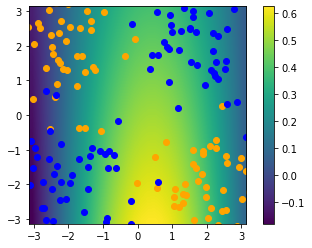

epoch 5 loss 0.9095442732856545


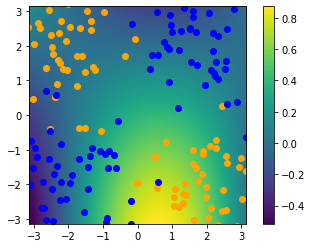

epoch 10 loss 0.6323304536754373


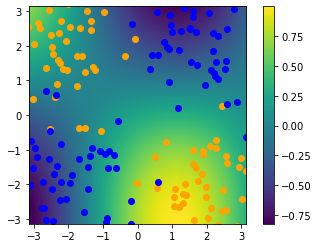

epoch 15 loss 0.41419894879449465


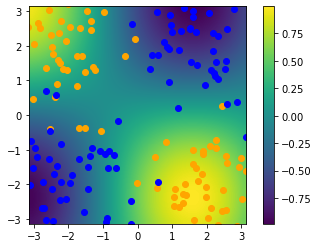

epoch 20 loss 0.3212138041363165


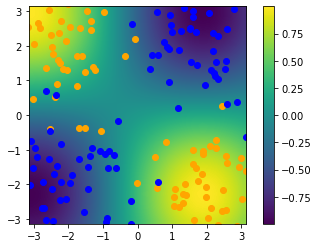

epoch 25 loss 0.2803257358768023


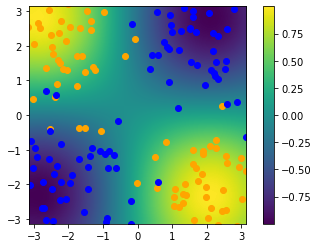

epoch 30 loss 0.2613976552999867


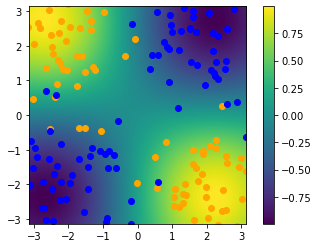

epoch 35 loss 0.2525408639490752


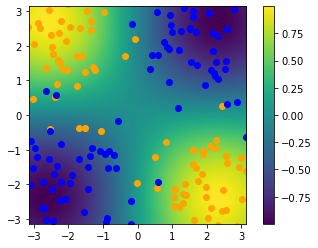

epoch 40 loss 0.2483855546284205


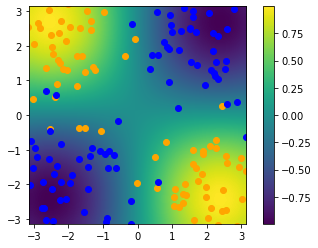

epoch 45 loss 0.24643427584513627


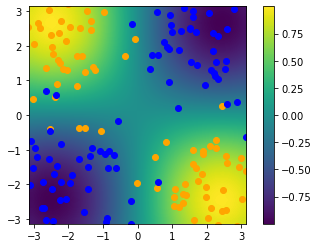

epoch 50 loss 0.24551763509610652


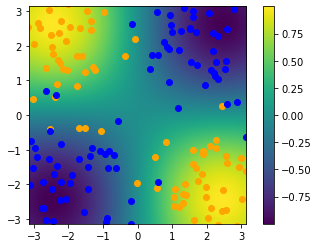

epoch 55 loss 0.24508694477169


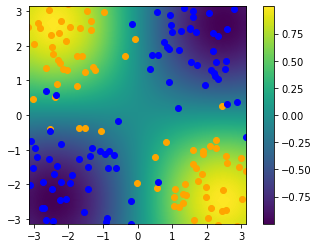

epoch 60 loss 0.2448845569888714


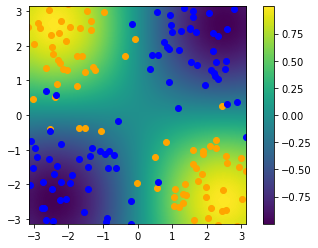

epoch 65 loss 0.24478944414518494


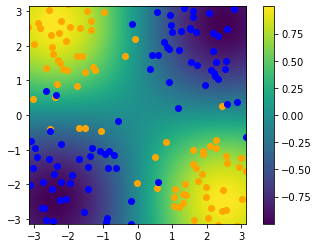

epoch 70 loss 0.24474474299270785


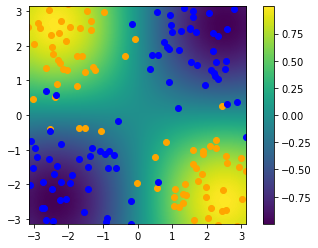

epoch 75 loss 0.2447237335049422


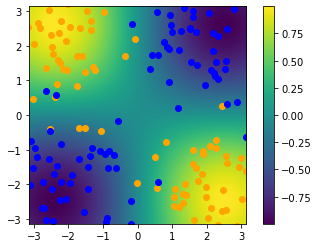

epoch 80 loss 0.24471385879894292


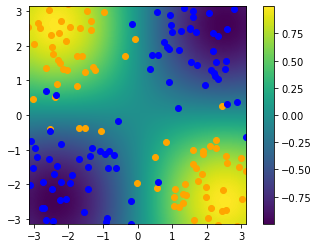

epoch 85 loss 0.2447092174823063


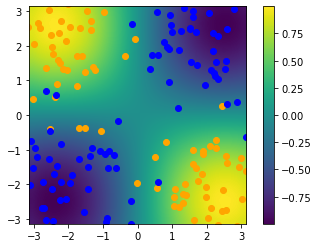

epoch 90 loss 0.24470703593823478


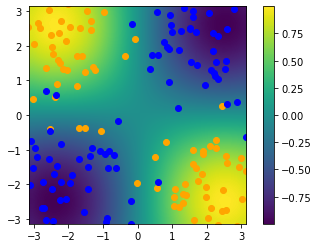

epoch 95 loss 0.24470601054417912


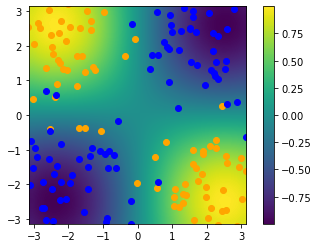

epoch 100 loss 0.24470552857374028


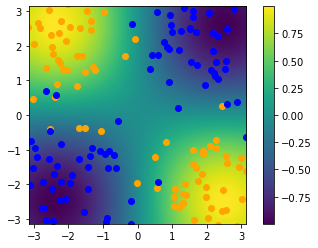

In [92]:
from IPython.display import clear_output
w = np.array([-1., -0.2, 0.,0.5], requires_grad = True)

lr = 0.1
for epoch in range(101):
    w = w - lr*gradient_fn_w(w,data)
    if epoch % 5 == 0:
        print("epoch", epoch, "loss", average_loss(w,data))
        plot(model)
        #clear_output(wait=True)

In [ ]:
dir(qml.templates)